<a href="https://colab.research.google.com/github/LilyHeAsamiko/Kepler-Predictor-Corrector-Algorithm/blob/main/Electron_cattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Electron Cattering

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from numpy import array,arange
# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
rr = []
Er = []
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    rr.append(psi2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    Er.append(E2)

print("E =",E2/e,"eV")
print(rr)
print(Er)

E = 134.28637169369105 eV
[5.2272161579438944e-11, 1.3686307647244209e-11, 5.3049212158378845e-12, 1.1112569883778003e-12, 1.2970720467377272e-13, 3.866933379260459e-15, 1.4130775280613555e-17]
[1.3127930593896974e-17, 1.772754570103909e-17, 2.0638829647467564e-17, 2.1410275441681793e-17, 2.151221838862766e-17, 2.15153509834661e-17, 2.151536247276318e-17]


In [13]:
au = 1.49597870e11 #1 au in m

[5.2272161579438944e-11, 1.3686307647244209e-11, 5.3049212158378845e-12, 1.1112569883778003e-12, 1.2970720467377272e-13, 3.866933379260459e-15, 1.4130775280613555e-17]
4.094056179391311e-15
0.049030417604034655
4.265561619316084e-203
[-42.32       -42.69634319 -43.07435235 -43.45402749 -43.8353686
 -44.21837568 -44.60304873 -44.98938776 -45.37739275 -45.76706372
 -46.15840067 -46.55140358 -46.94607247 -47.34240733 -47.74040816
 -48.14007497 -48.54140775 -48.9444065  -49.34907122 -49.75540192
 -50.16339858 -50.57306122 -50.98438984 -51.39738442 -51.81204498
 -52.22837151 -52.64636401 -53.06602249 -53.48734694 -53.91033736
 -54.33499375 -54.76131612 -55.18930446 -55.61895877 -56.05027905
 -56.48326531 -56.91791753 -57.35423574 -57.79221991 -58.23187005
 -58.67318617 -59.11616826 -59.56081633 -60.00713036 -60.45511037
 -60.90475635 -61.3560683  -61.80904623 -62.26369013 -62.72      ]
-9.252824931295435e-66
[9.78771479e+183 6.71796188e+183 4.60331020e+183 3.14904905e+183
 2.15062696e+183 1

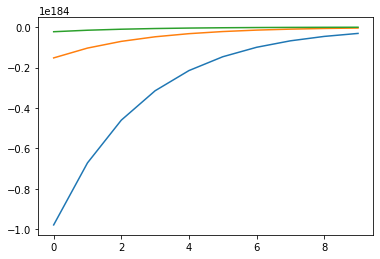

In [35]:
#over all proton j(assume j = 3)
x = np.linspace(-0.5,0.5,50)
dx = 0.1
for i in [1,2,3]:
  R1 = -4
  x0 = -5
  x += dx
  V = -e/abs(x-R1) #eV
  k = rr
  print(k)
  s1 = (1*au)**2+(k[-1]*0.2*au)**2
  r0 = (s1)**(1/2)
  E = 9.2 #eV
  p0 = np.sqrt(2*m*(E+1/r0))
  sigma = 0.5
  sigmax = sigma
  sigmap = hbar/2/sigmax
  p = p0 + np.sqrt(np.std(-(x-x0)**2/2/sigmax**2))/np.size(x)
  P0 = 1/(2*np.pi*hbar*sigmax*sigmap)**3*np.exp(-(x-x0)**2/2/sigmax**2-1/((p-p0)**2/2/sigmap**2))
  print(p0)
  print(p)
  print((2*np.pi*hbar*sigmax*sigmap)**3)
  print(-(x-x0)**2/2/sigmax**2)
  print(-1/((p-p0)**2/2/sigmap**2))
  print(P0)
  plt.plot(range(10),-P0[range(10)])